# Multivariate Distributions
## Gaussian Copulas
This notebook demonstrates how to use a Gaussian copula to model a simple dataset.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from copulas.multivariate import GaussianMultivariate

We'll start by generating a simple dataset with two clusters of values.

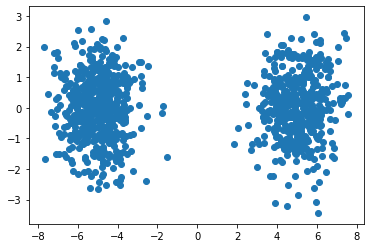

In [2]:
mask = 10*np.random.randint(0, 2, size=1000)-5
x = mask + np.random.normal(size=1000)
y = np.random.normal(size=1000)
dataset = pd.DataFrame({"x": x, "y": y})
plt.scatter(dataset["x"], dataset["y"]);

We can fit a Gaussian copula with Gaussian marginals. Note that the synthetic dataset constructed from this copula isn't particularly compelling.

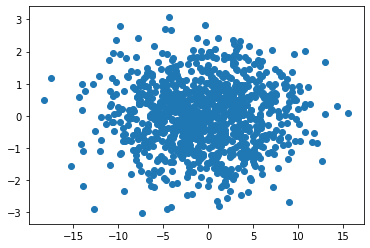

In [3]:
model = GaussianMultivariate(distribution='copulas.univariate.GaussianUnivariate')
model.fit(dataset)
synthetic = model.sample(1000)
plt.scatter(synthetic["x"], synthetic["y"]);

However, if we estimate the marginals with a Gaussian KDE instead, we are able to recover the two clusters successfully.

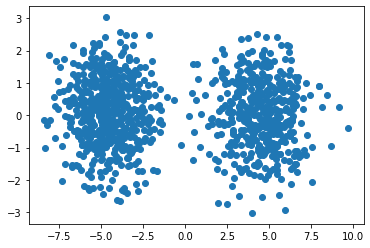

In [4]:
model = GaussianMultivariate(distribution='copulas.univariate.GaussianKDE')
model.fit(dataset)
synthetic = model.sample(1000)
plt.scatter(synthetic["x"], synthetic["y"]);

## Vine Copulas
This notebook demonstrates how to use a Vine copula to model a simple dataset.

In [5]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from copulas.multivariate import VineCopula

size = 1000

def plot(data):
    plt.figure(figsize=(16,4))

    plt.subplot(1, 2, 1)
    plt.scatter(data["x"], data["y"])
    plt.xlabel("x")
    plt.ylabel("y")

    plt.subplot(1, 2, 2)
    plt.scatter(data["x"], data["z"])
    plt.xlabel("x")
    plt.ylabel("y")

    plt.show()

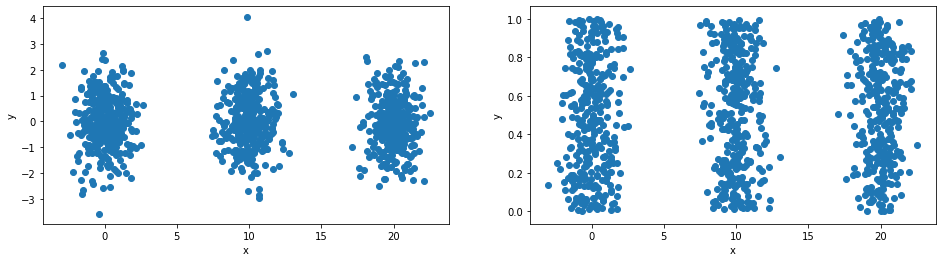

In [6]:
data = pd.DataFrame({
    "x": np.random.normal(size=size) + 10.0 * np.random.randint(0, 3, size=size),
    "y": np.random.normal(size=size),
    "z": np.random.uniform(size=size)
})
plot(data)

/Users/kevz/Desktop/Copulas/copulas/bivariate/base.py:160: RuntimeWarning: Data does not appear to be uniform.
  warnings.warn("Data does not appear to be uniform.", category=RuntimeWarning)


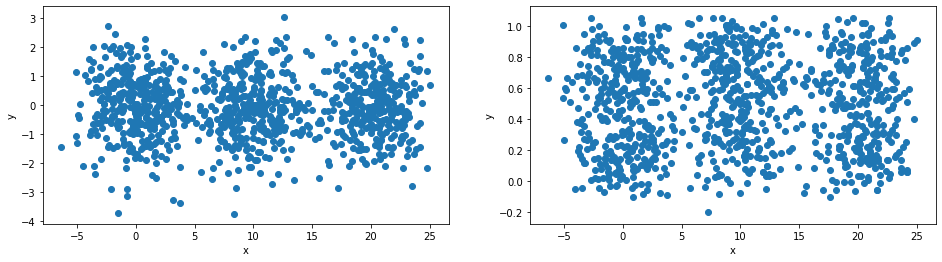

In [7]:
model=VineCopula(vine_type='regular')
model.fit(data)
synthetic = model.sample(num_rows=size)
plot(synthetic)